In [ ]:
from huggingface_hub import notebook_login
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
notebook_login()

In [12]:

img_path = 'X:/1. data/월별 학습데이터/9월 학습데이터/Export_TrainData_2023_Geo01-190_230921/datasets/train/images/202305251342_im[003539].jpg'

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b5-finetuned-cityscapes-1024-1024")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b5-finetuned-cityscapes-1024-1024")

image = Image.open(img_path)

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits  

C:\Users\dudtj\transformers\src\transformers\models\segformer\feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
C:\Users\dudtj\transformers\src\transformers\models\segformer\image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [16]:
segmentation_results = torch.argmax(logits, dim=1).numpy()
segmentation_results

array([[[10, 10, 10, ...,  8,  8,  8],
        [10, 10, 10, ...,  8,  8,  8],
        [10, 10, 10, ...,  8,  8,  8],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]]], dtype=int64)

In [1]:
torch.argmax(logits, dim=1)

NameError: name 'torch' is not defined

In [34]:
colors = np.array([
    [0, 64, 0],      
    [128, 0, 0],    
    [0, 128, 0],     
    [128, 128, 0],  
    [0, 0, 128],    
    [128, 0, 128],   
    [0, 128, 128],   
    [128, 128, 64], 
    [64, 0, 0],      
    [0, 64, 0],
    [255,255,0],
    [64,64,64],
    [0,128,128],
    [0,255,255]  
])

In [35]:
segmentation_color = colors[segmentation_results[0]]

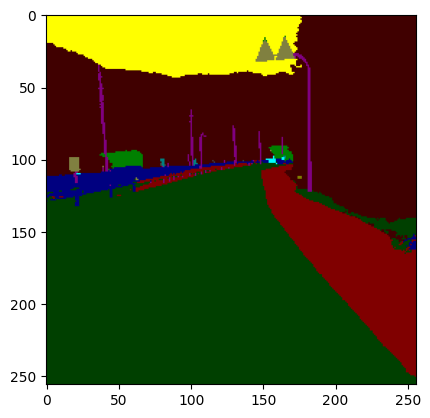

In [36]:
plt.imshow(segmentation_color)
plt.show()

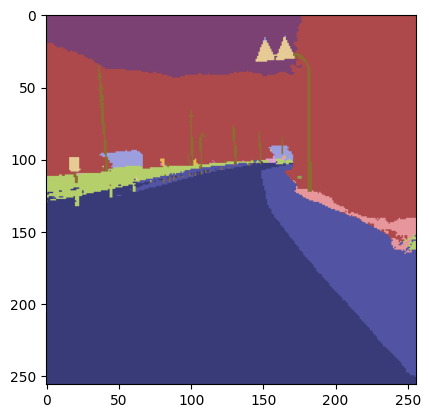

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import torch

img_path = 'X:/1. data/월별 학습데이터/9월 학습데이터/Export_TrainData_2023_Geo01-190_230921/datasets/train/images/202305251342_im[003539].jpg'

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b5-finetuned-cityscapes-1024-1024")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b5-finetuned-cityscapes-1024-1024")

image = Image.open(img_path)
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits


segmentation_results = torch.argmax(logits, dim=1).numpy()

unique_labels = np.unique(segmentation_results)

cmap = plt.get_cmap('tab20b', len(unique_labels))  
colors = cmap(np.arange(len(unique_labels)+1))[:, :3] * 255 

segmentation_color = colors[segmentation_results[0]]

plt.imshow(image)
plt.imshow(segmentation_color.astype(np.uint8))
plt.show()